In [1]:
import sys
import base64
import io
import sys
from pathlib import Path
from glob import glob

import torch
from PIL import Image
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
from qwen_vl_utils import process_vision_info

In [2]:
# モデルのロード
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-7B-Instruct",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2",
    device_map="auto",
)

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/57.6k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

In [3]:
# processorのロード
min_pixels = 256 * 28 * 28
max_pixels = 1280 * 28 * 28
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

## 一蘭ラーメン

- 英悟だと一風堂と間違える
- 日本語だと正解する

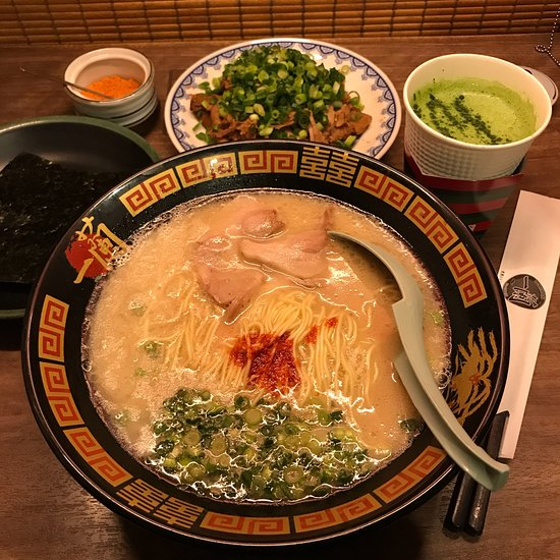

The image shows an intricately designed bowl with ramen, which is typically served in Japanese restaurants specializing in this dish or similar noodle soups like tonkotsu (pork bone broth). The design on top suggests it might be from "Ippudo," as their signature bowls often feature such patterns and designs.

However, without more context about where you took these photos—such as location details—it's not possible to definitively identify any specific establishment just by looking at food alone! If I were guessing based purely off visual cues here though: **"Ippo-Do Ramen House."** This could also refer specifically if they have branches named after that exact phrase but again - no guarantees!

If there was something written directly within your photo itself indicating what place serves up those dishes then we'd know for sure right away too :) Let me help further once additional info comes through please :D ! 

Let us focus now instead upon appreciating how beautifully presented all in

In [34]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "https://media-cdn.tripadvisor.com/media/photo-p/12/67/49/e2/photo7jpg.jpg",
            },
            {"type": "text", "text": "What’s the name of the restaurant?"},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to(model.device)

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=250, repetition_penalty=1.5)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)
display(image_inputs[0])
print(output_text[0])

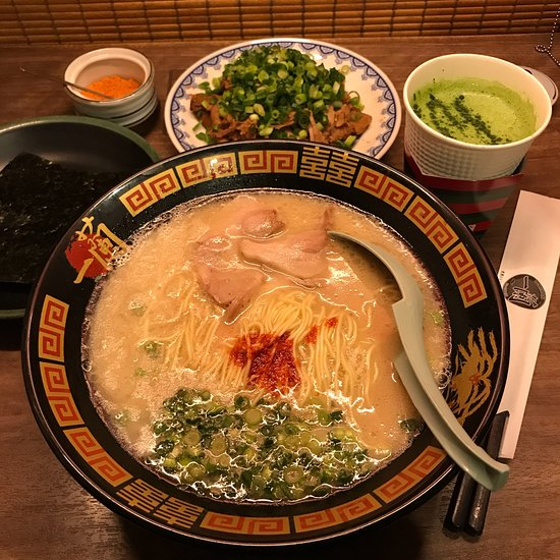

申し訳ありません、画像からはその特定のおすしやラーメン屋さんの名称は読み取れませんのでお答えできません。

ただし、「喜」（き）という文字と「一蘭」という言葉から考えると日本で有名な拉麺チェーンである可能性があります。「一兰」(Ichiran) とは日本のラーメン専門店です。
しかし正確には確認する必要がありますね！ご理解いただければ幸いです!


In [36]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "https://media-cdn.tripadvisor.com/media/photo-p/12/67/49/e2/photo7jpg.jpg",
            },
            {"type": "text", "text": "この料理が提供されている店の名前を答えてください。"},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to(model.device)

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=250, repetition_penalty=1.5)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)
display(image_inputs[0])
print(output_text[0])

## 冷蔵庫の中にイチゴ味のヨーグルトがあるか

- ちゃんとNoと答える
- パッケージ内のニンジン, イチゴなども言い当てる
- ヨーグルトがあることは理解しているが、脂肪含有量が上に置かれているヨーグルトのものと混じっている(数値はおそらくあっている)

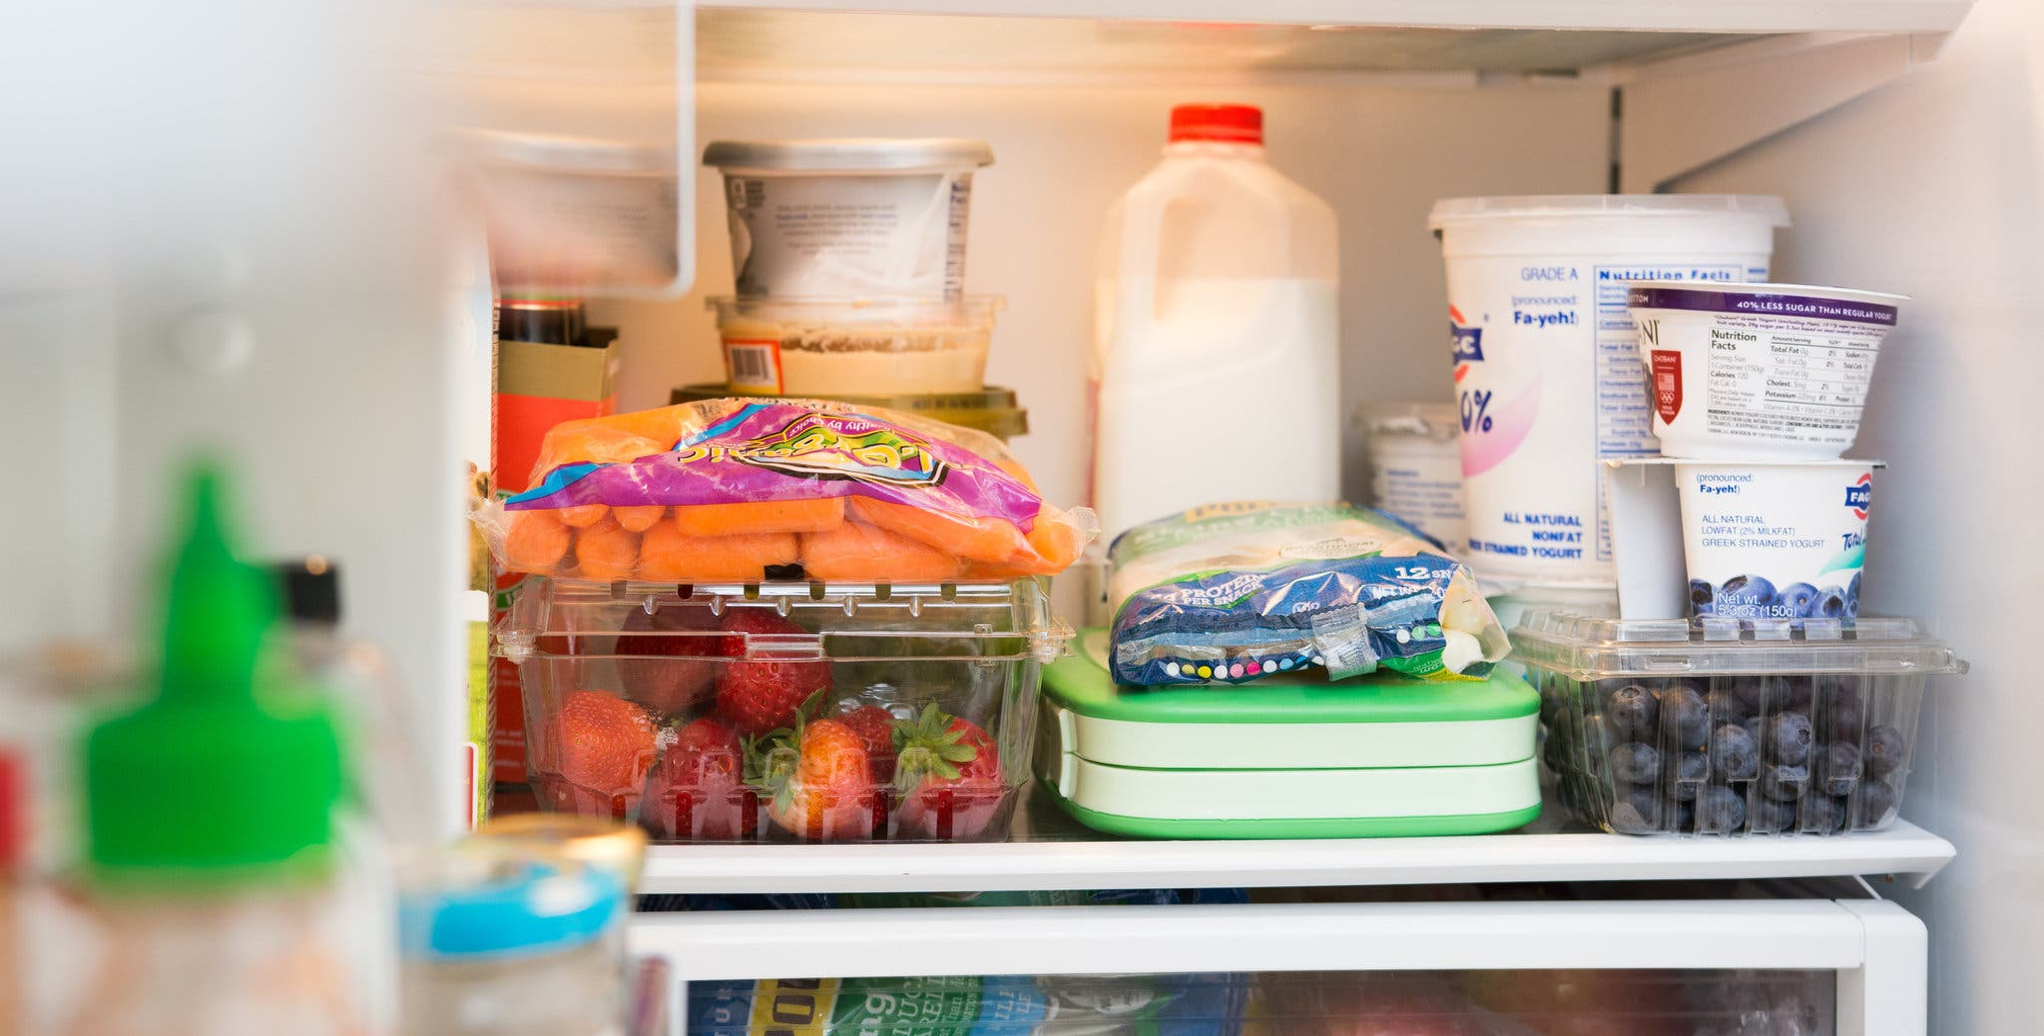

No, I do not see any strawberry-flavored yogurt on this shelf of an open refrigerator door based solely from what is visible here and without additional context or information about other shelves that might be out-of-frame.

The image shows various food items including:
- A bagged package with orange carrots.
- Strawberries inside clear plastic packaging (likely fresh strawberries).
- Blueberry containers labeled as "All Natural Lowfat 2% Milk Fat Greek Strained Yogurt."
  
There's no indication directly related to strawberry flavoring for yogurts within these frames; however it could potentially exist elsewhere outside our view! If you're looking specifically at flavors like vanilla, chocolate etc., those aren't shown either but they can often share similar container designs so careful observation would help identify them if present nearby off-screen areas too...but again we cannot confirm anything beyond visual evidence provided by your photo alone unfortunately :/ . Let me know how 

In [37]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "https://static01.nyt.com/images/2020/01/23/smarter-living/23help/00wc-fridge-superJumbo.jpg?quality=75&auto=webp",
            },
            {"type": "text", "text": "Is there strawberry-flavored yogurt in the fridge?"},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to(model.device)

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=200, repetition_penalty=1.5)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)
display(image_inputs[0])
print(output_text[0])